### Name: Tai Ngo
### DSC-680: Data Science Application

### Using Sentiment Analysis on Finviz Articles about Stocks

#### Skills: Web Scraping, Data Analysis, Data Visualization

In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

#### Stocks: S&P 500 ETF (SPY), Techology ETF (TQQQ), Gold Index (GOLD)

In [2]:
# get the data from finviz for three tickers: SPY, TQQQ and VIXY

fv_url = 'https://finviz.com/quote.ashx?t='
tickers = ['QQQ', 'GLD', 'SPY']

table_news = {}

for symbol in tickers:
    url = fv_url + symbol
    
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    table_news[symbol] = news_table

#### Parse and Manipulate the Data

In [3]:
# obtain text for SPY
'''spy_ = table_news['SPY']
spy__ = spy_.findAll('tr')

for i, r in enumerate(spy__):
    contents = r.a.text
    timestamp = r.td.text
    
print(timestamp + " " + contents)'''

'spy_ = table_news[\'SPY\']\nspy__ = spy_.findAll(\'tr\')\n\nfor i, r in enumerate(spy__):\n    contents = r.a.text\n    timestamp = r.td.text\n    \nprint(timestamp + " " + contents)'

In [4]:
parsed_ = []

for symbol, news_table in table_news.items():
    for r in news_table.findAll('tr'):
        contents = r.a.get_text()
        date_ = r.td.text.split(' ')
        
        if len(date_) == 1:
            time = date_[0]
        else:
            date = date_[0]
            time = date_[1]
            
        parsed_.append([symbol, date, time, contents])
        
print(parsed_[10])

['QQQ', 'Feb-26-21', '06:05AM\xa0\xa0', "Retail traders say they're not going anywhere"]


#### Sentiment Analysis

In [5]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [6]:
# create a dataframe from the parsed data
df = pd.DataFrame(parsed_, columns=['Symbol', 'Date', 'Time', 'Contents'])
df.head(7)

,Symbol,Date,Time,Contents
0,QQQ,Mar-03-21,04:00PM,Stock market news live updates: Stocks end low...
1,QQQ,Mar-03-21,01:57PM,Who Are the ETF Giants?
2,QQQ,Mar-03-21,08:15AM,"Private employers added back 117,000 jobs in F..."
3,QQQ,Mar-03-21,06:01AM,SPACs are now a $700 billion market: Morning B...
4,QQQ,Mar-02-21,04:00PM,Stock market news live updates: Stocks retreat...
5,QQQ,Mar-02-21,06:02AM,American manufacturing is roaring back
6,QQQ,Mar-01-21,04:00PM,Stock market news live updates: Stocks rally a...


In [7]:
# install vader_lexicon
#nltk.download('vader_lexicon')

In [8]:
# vader to analyzer the text contents
vader = SentimentIntensityAnalyzer()

In [9]:
# perform a negative test by using vader
print(vader.polarity_scores("The infection rate is increasing. The economy will crash"))

{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'compound': -0.4019}


In [10]:
# perform a positive test by using vader
print(vader.polarity_scores("The earning reports are great. The stocks will rise"))

{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.6249}


In [11]:
# create a new column with the Score from vader
df['Score'] = df['Contents'].apply(lambda contents: vader.polarity_scores(contents)['compound'])

In [12]:
# examine some columns
df[10:20].head()

,Symbol,Date,Time,Contents,Score
10,QQQ,Feb-26-21,06:05AM,Retail traders say they're not going anywhere,0.0000
11,QQQ,Feb-26-21,06:00AM,YF Spotlight: American educators search for co...,0.0000
12,QQQ,Feb-25-21,04:41PM,These Nasdaq 100 stocks fell the most on Feb. 25,0.0000
13,QQQ,Feb-25-21,04:03PM,"Stock market news live updates: Stocks drop, N...",-0.7351
14,QQQ,Feb-25-21,06:00AM,'I don't' miss the glamour of Hollywood: Legen...,0.1200


#### Data Visualization

In [13]:
import matplotlib.pyplot as plt

In [14]:
# convert the Date column from str to date-time format
df['Date'] = pd.to_datetime(df.Date).dt.date

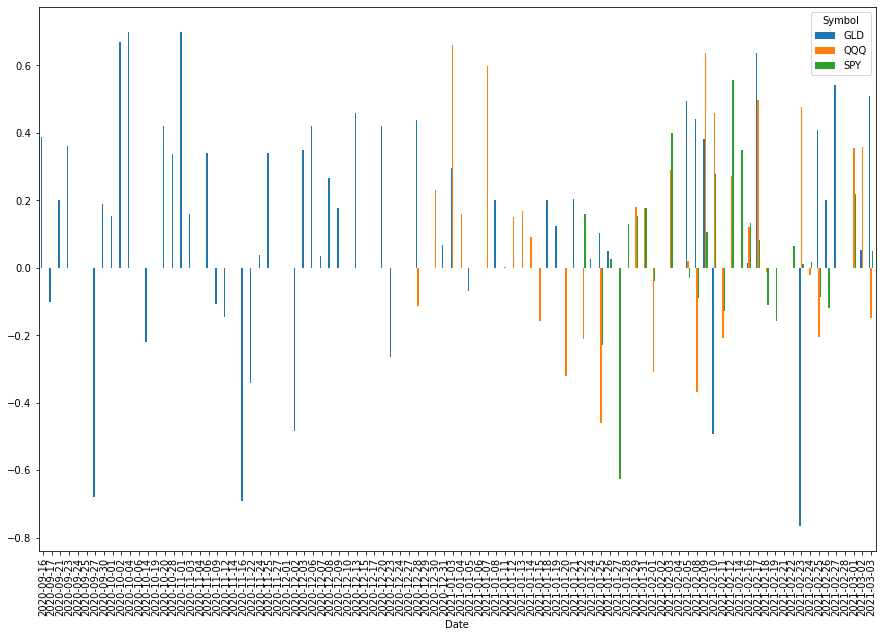

In [15]:
# plot the bar chart
mean_ = df.groupby(['Symbol', 'Date']).mean()
mean_ = mean_.unstack()
mean_ = mean_.xs('Score', axis='columns').transpose()
mean_.plot(kind='bar', figsize=(15,10))
plt.show()

#### Interesting Find: Stocks tend to dip before every election, this chart shows that there were good news before election. 
#### As a result, the S&P 500 Index (SPY) jumped a whoppy 11% during the election week.

#### For one stock

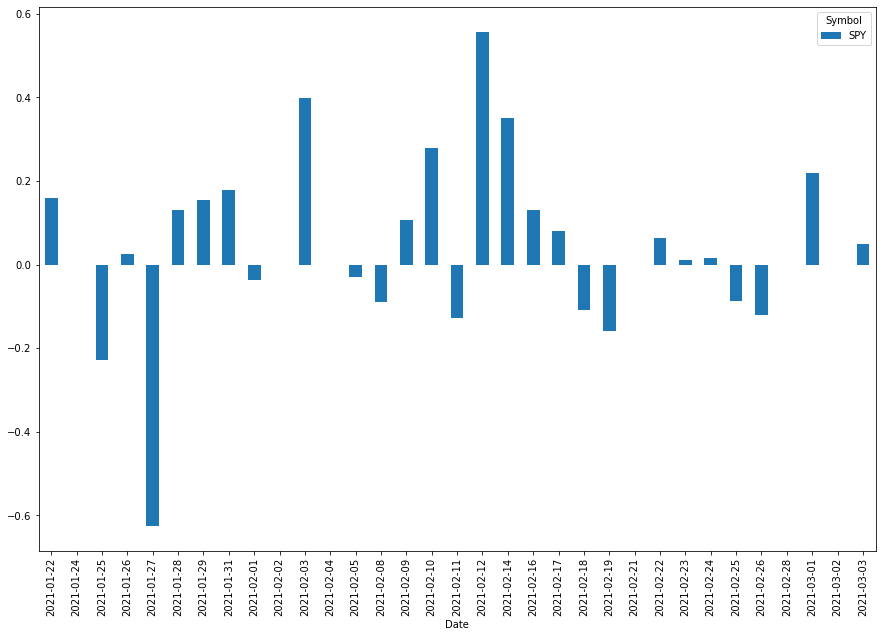

In [16]:
#### Insert any stock ticker to get its sentiment analysis

tickers = ['SPY']

table_news = {}

for symbol in tickers:
    url = fv_url + symbol
    
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    table_news[symbol] = news_table

parsed_ = []

for symbol, news_table in table_news.items():
    for r in news_table.findAll('tr'):
        contents = r.a.get_text()
        date_ = r.td.text.split(' ')
        
        if len(date_) == 1:
            time = date_[0]
        else:
            date = date_[0]
            time = date_[1]
            
        parsed_.append([symbol, date, time, contents])
        
df = pd.DataFrame(parsed_, columns=['Symbol', 'Date', 'Time', 'Contents'])
df['Score'] = df['Contents'].apply(lambda contents: vader.polarity_scores(contents)['compound'])
df['Date'] = pd.to_datetime(df.Date).dt.date
mean_ = df.groupby(['Symbol', 'Date']).mean()
mean_ = mean_.unstack()
mean_ = mean_.xs('Score', axis='columns').transpose()
mean_.plot(kind='bar', figsize=(15,10))
plt.show()

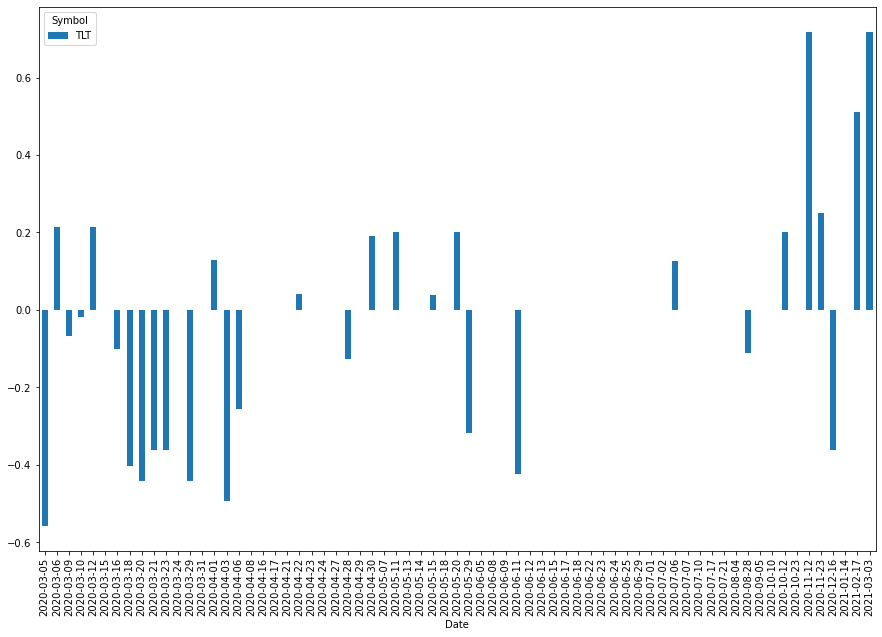

In [17]:
#### Insert any stock ticker to get its sentiment analysis

tickers = ['TLT']

table_news = {}

for symbol in tickers:
    url = fv_url + symbol
    
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    table_news[symbol] = news_table

parsed_ = []

for symbol, news_table in table_news.items():
    for r in news_table.findAll('tr'):
        contents = r.a.get_text()
        date_ = r.td.text.split(' ')
        
        if len(date_) == 1:
            time = date_[0]
        else:
            date = date_[0]
            time = date_[1]
            
        parsed_.append([symbol, date, time, contents])
        
df = pd.DataFrame(parsed_, columns=['Symbol', 'Date', 'Time', 'Contents'])
df['Score'] = df['Contents'].apply(lambda contents: vader.polarity_scores(contents)['compound'])
df['Date'] = pd.to_datetime(df.Date).dt.date
mean_ = df.groupby(['Symbol', 'Date']).mean()
mean_ = mean_.unstack()
mean_ = mean_.xs('Score', axis='columns').transpose()
mean_.plot(kind='bar', figsize=(15,10))
plt.show()

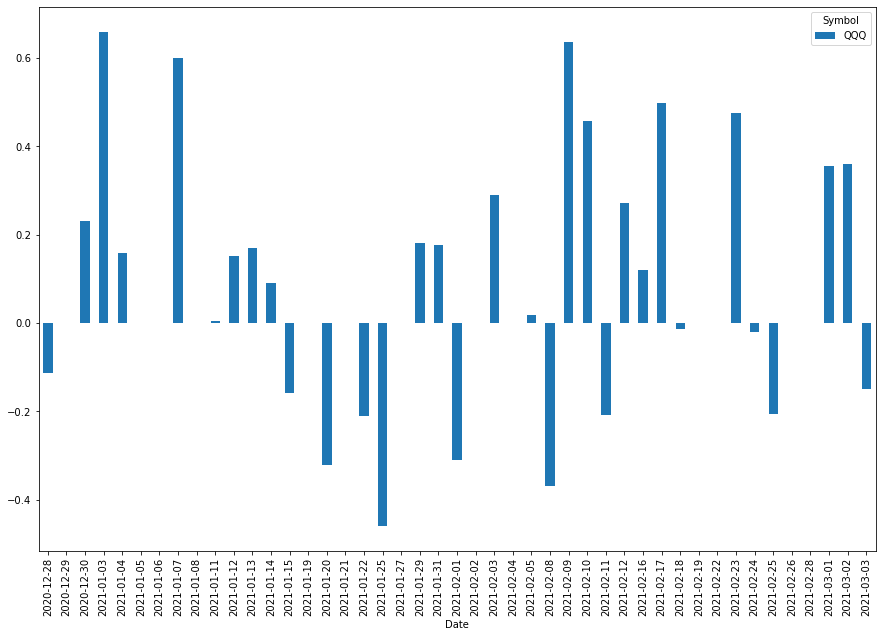

In [18]:
#### Insert any stock ticker to get its sentiment analysis

tickers = ['QQQ']

table_news = {}

for symbol in tickers:
    url = fv_url + symbol
    
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    table_news[symbol] = news_table

parsed_ = []

for symbol, news_table in table_news.items():
    for r in news_table.findAll('tr'):
        contents = r.a.get_text()
        date_ = r.td.text.split(' ')
        
        if len(date_) == 1:
            time = date_[0]
        else:
            date = date_[0]
            time = date_[1]
            
        parsed_.append([symbol, date, time, contents])
        
df = pd.DataFrame(parsed_, columns=['Symbol', 'Date', 'Time', 'Contents'])
df['Score'] = df['Contents'].apply(lambda contents: vader.polarity_scores(contents)['compound'])
df['Date'] = pd.to_datetime(df.Date).dt.date
mean_ = df.groupby(['Symbol', 'Date']).mean()
mean_ = mean_.unstack()
mean_ = mean_.xs('Score', axis='columns').transpose()
mean_.plot(kind='bar', figsize=(15,10))
plt.show()

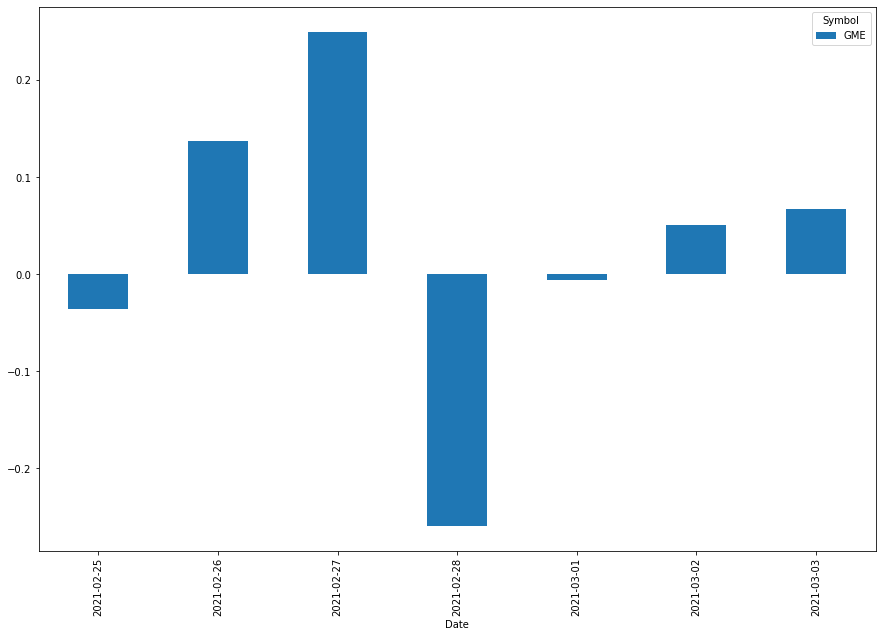

In [19]:
#### Insert any stock ticker to get its sentiment analysis

tickers = ['GME']

table_news = {}

for symbol in tickers:
    url = fv_url + symbol
    
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    table_news[symbol] = news_table

parsed_ = []

for symbol, news_table in table_news.items():
    for r in news_table.findAll('tr'):
        contents = r.a.get_text()
        date_ = r.td.text.split(' ')
        
        if len(date_) == 1:
            time = date_[0]
        else:
            date = date_[0]
            time = date_[1]
            
        parsed_.append([symbol, date, time, contents])
        
df = pd.DataFrame(parsed_, columns=['Symbol', 'Date', 'Time', 'Contents'])
df['Score'] = df['Contents'].apply(lambda contents: vader.polarity_scores(contents)['compound'])
df['Date'] = pd.to_datetime(df.Date).dt.date
mean_ = df.groupby(['Symbol', 'Date']).mean()
mean_ = mean_.unstack()
mean_ = mean_.xs('Score', axis='columns').transpose()
mean_.plot(kind='bar', figsize=(15,10))
plt.show()

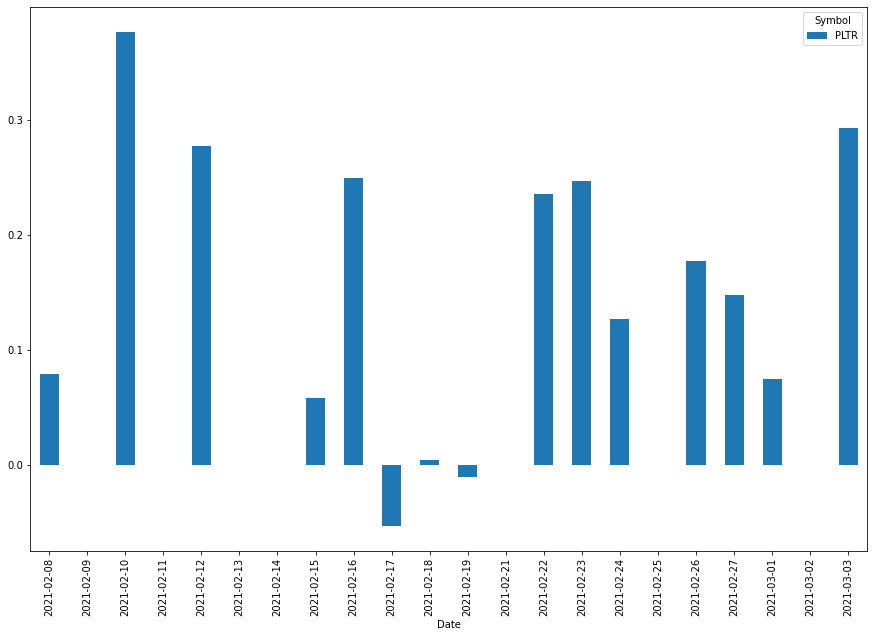

In [20]:
#### Insert any stock ticker to get its sentiment analysis

tickers = ['PLTR']

table_news = {}

for symbol in tickers:
    url = fv_url + symbol
    
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    table_news[symbol] = news_table

parsed_ = []

for symbol, news_table in table_news.items():
    for r in news_table.findAll('tr'):
        contents = r.a.get_text()
        date_ = r.td.text.split(' ')
        
        if len(date_) == 1:
            time = date_[0]
        else:
            date = date_[0]
            time = date_[1]
            
        parsed_.append([symbol, date, time, contents])
        
df = pd.DataFrame(parsed_, columns=['Symbol', 'Date', 'Time', 'Contents'])
df['Score'] = df['Contents'].apply(lambda contents: vader.polarity_scores(contents)['compound'])
df['Date'] = pd.to_datetime(df.Date).dt.date
mean_ = df.groupby(['Symbol', 'Date']).mean()
mean_ = mean_.unstack()
mean_ = mean_.xs('Score', axis='columns').transpose()
mean_.plot(kind='bar', figsize=(15,10))
plt.show()

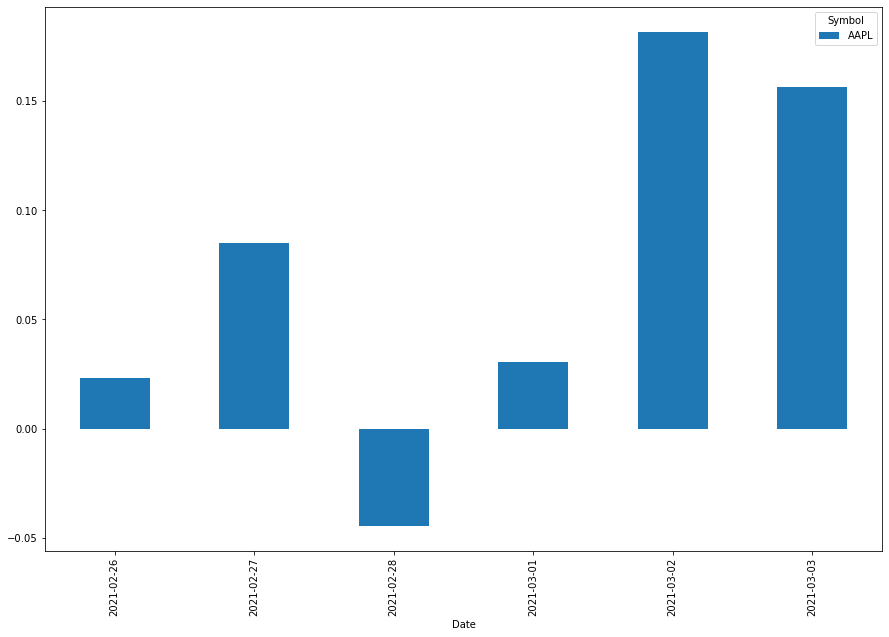

In [21]:
#### Insert any stock ticker to get its sentiment analysis

tickers = ['AAPL']

table_news = {}

for symbol in tickers:
    url = fv_url + symbol
    
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    table_news[symbol] = news_table

parsed_ = []

for symbol, news_table in table_news.items():
    for r in news_table.findAll('tr'):
        contents = r.a.get_text()
        date_ = r.td.text.split(' ')
        
        if len(date_) == 1:
            time = date_[0]
        else:
            date = date_[0]
            time = date_[1]
            
        parsed_.append([symbol, date, time, contents])
        
df = pd.DataFrame(parsed_, columns=['Symbol', 'Date', 'Time', 'Contents'])
df['Score'] = df['Contents'].apply(lambda contents: vader.polarity_scores(contents)['compound'])
df['Date'] = pd.to_datetime(df.Date).dt.date
mean_ = df.groupby(['Symbol', 'Date']).mean()
mean_ = mean_.unstack()
mean_ = mean_.xs('Score', axis='columns').transpose()
mean_.plot(kind='bar', figsize=(15,10))
plt.show()

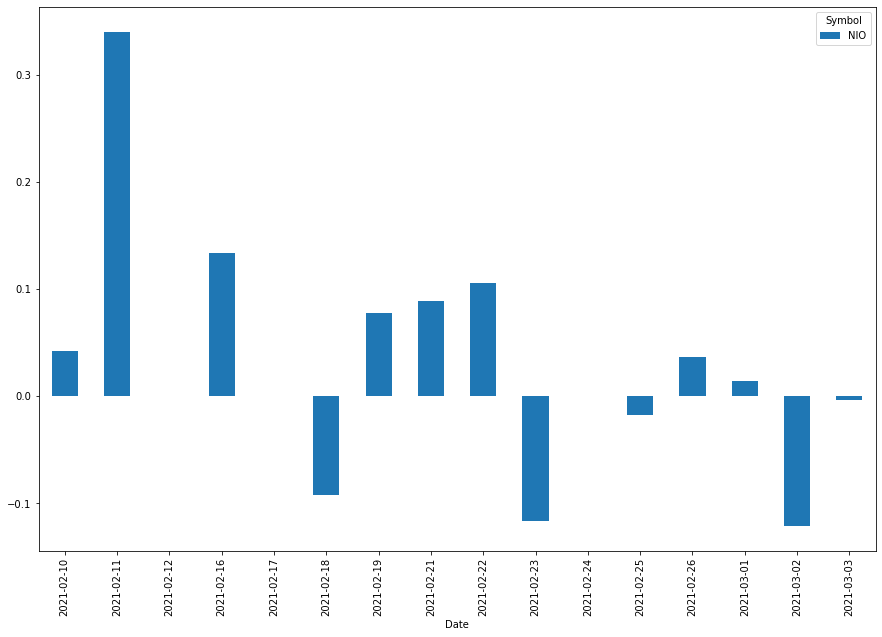

In [22]:
#### Insert any stock ticker to get its sentiment analysis

tickers = ['NIO']

table_news = {}

for symbol in tickers:
    url = fv_url + symbol
    
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    table_news[symbol] = news_table

parsed_ = []

for symbol, news_table in table_news.items():
    for r in news_table.findAll('tr'):
        contents = r.a.get_text()
        date_ = r.td.text.split(' ')
        
        if len(date_) == 1:
            time = date_[0]
        else:
            date = date_[0]
            time = date_[1]
            
        parsed_.append([symbol, date, time, contents])
        
df = pd.DataFrame(parsed_, columns=['Symbol', 'Date', 'Time', 'Contents'])
df['Score'] = df['Contents'].apply(lambda contents: vader.polarity_scores(contents)['compound'])
df['Date'] = pd.to_datetime(df.Date).dt.date
mean_ = df.groupby(['Symbol', 'Date']).mean()
mean_ = mean_.unstack()
mean_ = mean_.xs('Score', axis='columns').transpose()
mean_.plot(kind='bar', figsize=(15,10))
plt.show()

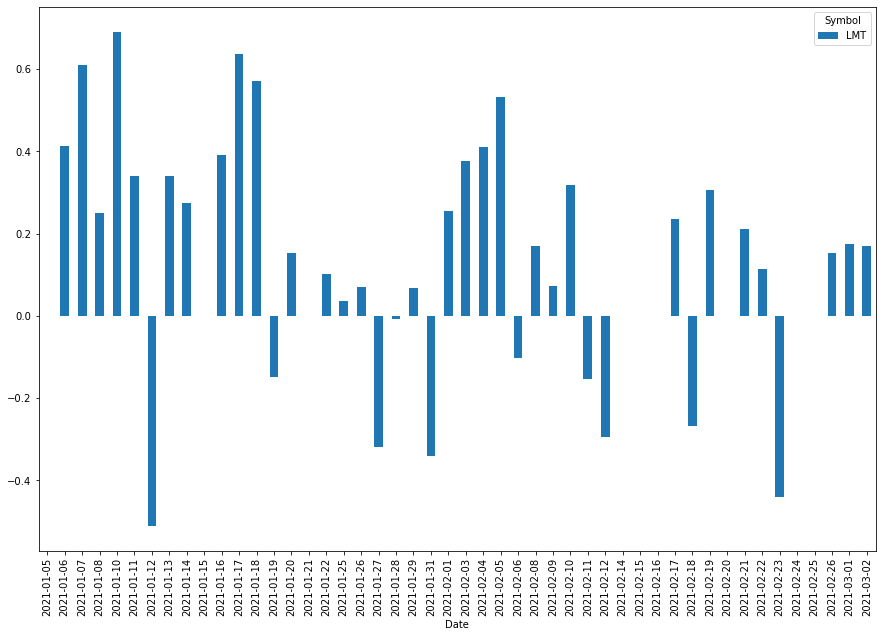

In [23]:
#### Insert any stock ticker to get its sentiment analysis

tickers = ['LMT']

table_news = {}

for symbol in tickers:
    url = fv_url + symbol
    
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    table_news[symbol] = news_table

parsed_ = []

for symbol, news_table in table_news.items():
    for r in news_table.findAll('tr'):
        contents = r.a.get_text()
        date_ = r.td.text.split(' ')
        
        if len(date_) == 1:
            time = date_[0]
        else:
            date = date_[0]
            time = date_[1]
            
        parsed_.append([symbol, date, time, contents])
        
df = pd.DataFrame(parsed_, columns=['Symbol', 'Date', 'Time', 'Contents'])
df['Score'] = df['Contents'].apply(lambda contents: vader.polarity_scores(contents)['compound'])
df['Date'] = pd.to_datetime(df.Date).dt.date
mean_ = df.groupby(['Symbol', 'Date']).mean()
mean_ = mean_.unstack()
mean_ = mean_.xs('Score', axis='columns').transpose()
mean_.plot(kind='bar', figsize=(15,10))
plt.show()

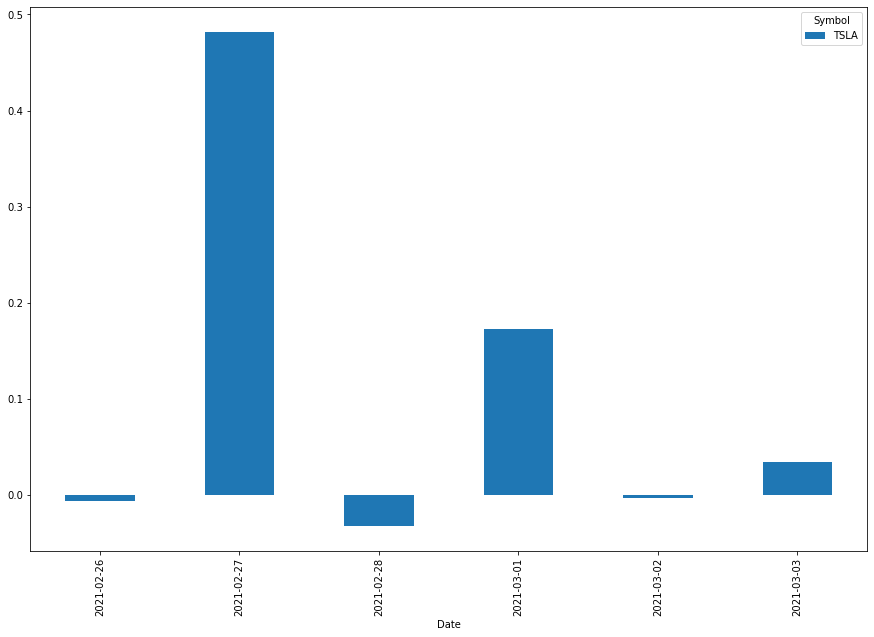

In [24]:
#### Insert any stock ticker to get its sentiment analysis

tickers = ['TSLA']

table_news = {}

for symbol in tickers:
    url = fv_url + symbol
    
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    table_news[symbol] = news_table

parsed_ = []

for symbol, news_table in table_news.items():
    for r in news_table.findAll('tr'):
        contents = r.a.get_text()
        date_ = r.td.text.split(' ')
        
        if len(date_) == 1:
            time = date_[0]
        else:
            date = date_[0]
            time = date_[1]
            
        parsed_.append([symbol, date, time, contents])
        
df = pd.DataFrame(parsed_, columns=['Symbol', 'Date', 'Time', 'Contents'])
df['Score'] = df['Contents'].apply(lambda contents: vader.polarity_scores(contents)['compound'])
df['Date'] = pd.to_datetime(df.Date).dt.date
mean_ = df.groupby(['Symbol', 'Date']).mean()
mean_ = mean_.unstack()
mean_ = mean_.xs('Score', axis='columns').transpose()
mean_.plot(kind='bar', figsize=(15,10))
plt.show()